#### Assumptions in multilinear regression
- Linearity: The relation between the predictors and the response is linear
- independence: Observations are independent of each other.
- Homoscedasticity: The residuals(differences between observed and predicted values) exhibits constant variance at all levels of the predictor.
- Normal distribution of errors: The residuals of the model are normally distributed.
- No Multicollinearity: The independent variables should not be too highly correlated with each other.

In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [17]:
%pip install seaborn

In [18]:
cars = pd.read_csv("Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [19]:
cars = pd.DataFrame(cars, columns=['HP',"VOL", "SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


#### Description of the cplumns
- MPG : Milage of the car (mile per Gallon)
- HP  : Horse power of the car
- VOL : Volume of the car (size)
- SP  : Top speed of the car (miles per hour)
- WT  : Weight of the car

#### EDA

In [20]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   VOL     81 non-null     int64  
 2   SP      81 non-null     float64
 3   WT      81 non-null     float64
 4   MPG     81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.2 KB


In [21]:
cars.isna().sum()

HP     0
VOL    0
SP     0
WT     0
MPG    0
dtype: int64

#### Observations
- There are no missing values
- There are 81 observations
- The data types of the columns are relevant and valid

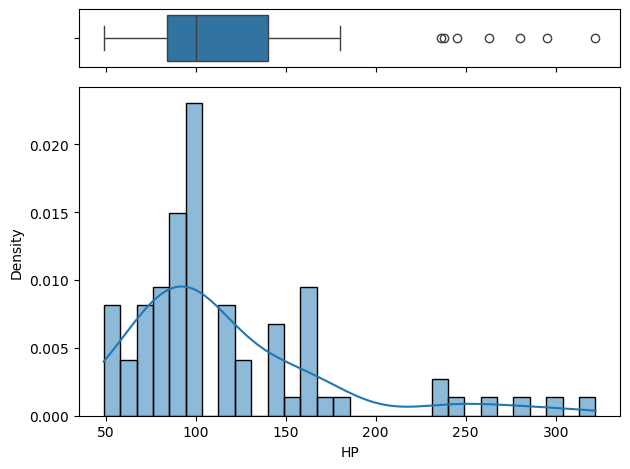

In [22]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(data=cars,x='HP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='HP', ax=ax_hist, bins=30, kde= True, stat = 'density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

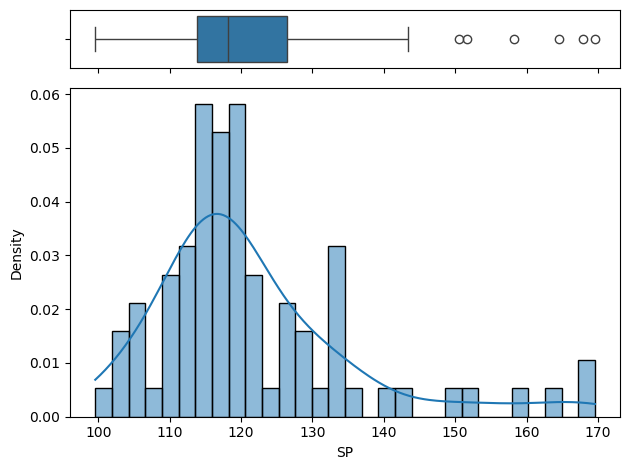

In [23]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(data=cars,x='SP', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='SP', ax=ax_hist, bins=30, kde= True, stat = 'density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

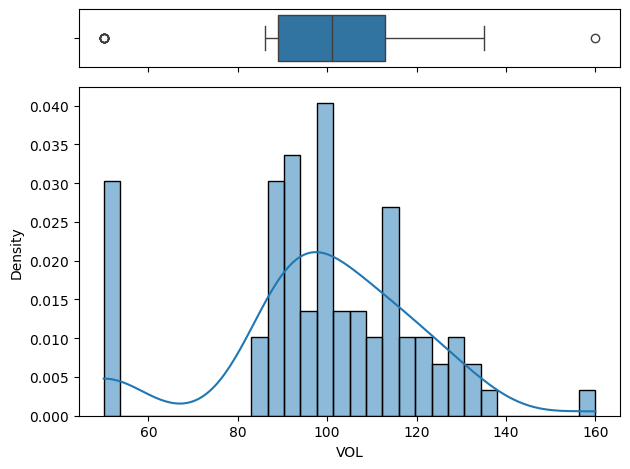

In [24]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(data=cars,x='VOL', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='VOL', ax=ax_hist, bins=30, kde= True, stat = 'density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

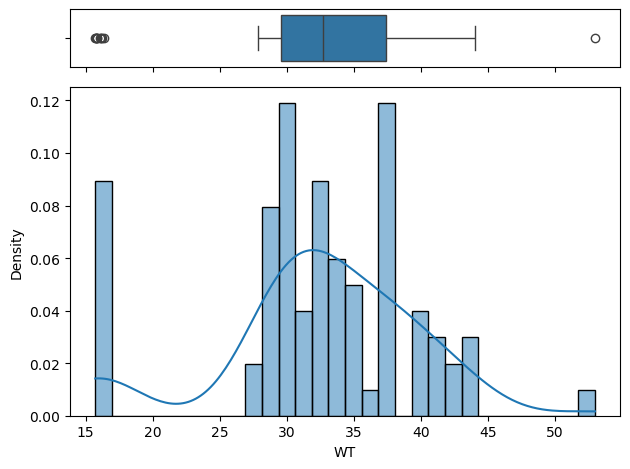

In [25]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(data=cars,x='WT', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='WT', ax=ax_hist, bins=30, kde= True, stat = 'density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

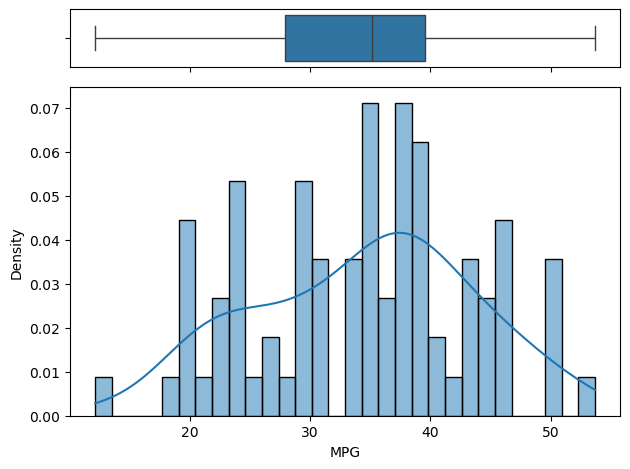

In [26]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, gridspec_kw={'height_ratios':(.15, .85)})
sns.boxplot(data=cars,x='MPG', ax=ax_box, orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars, x='MPG', ax=ax_hist, bins=30, kde= True, stat = 'density')
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

#### Observations from boxplot and histograms
- There are some extreme(outliers) observed in towards the right tail of SP and HP distributions.
- In VOL and Wt columns, a few outliers are observed in both tails of therir distributions.
- The extreme values of cars data may have come from the specially designed nature of cars.
- As this is multi-dimensional data, the outliers with respect

In [27]:
cars[cars.duplicated()]

,HP,VOL,SP,WT,MPG


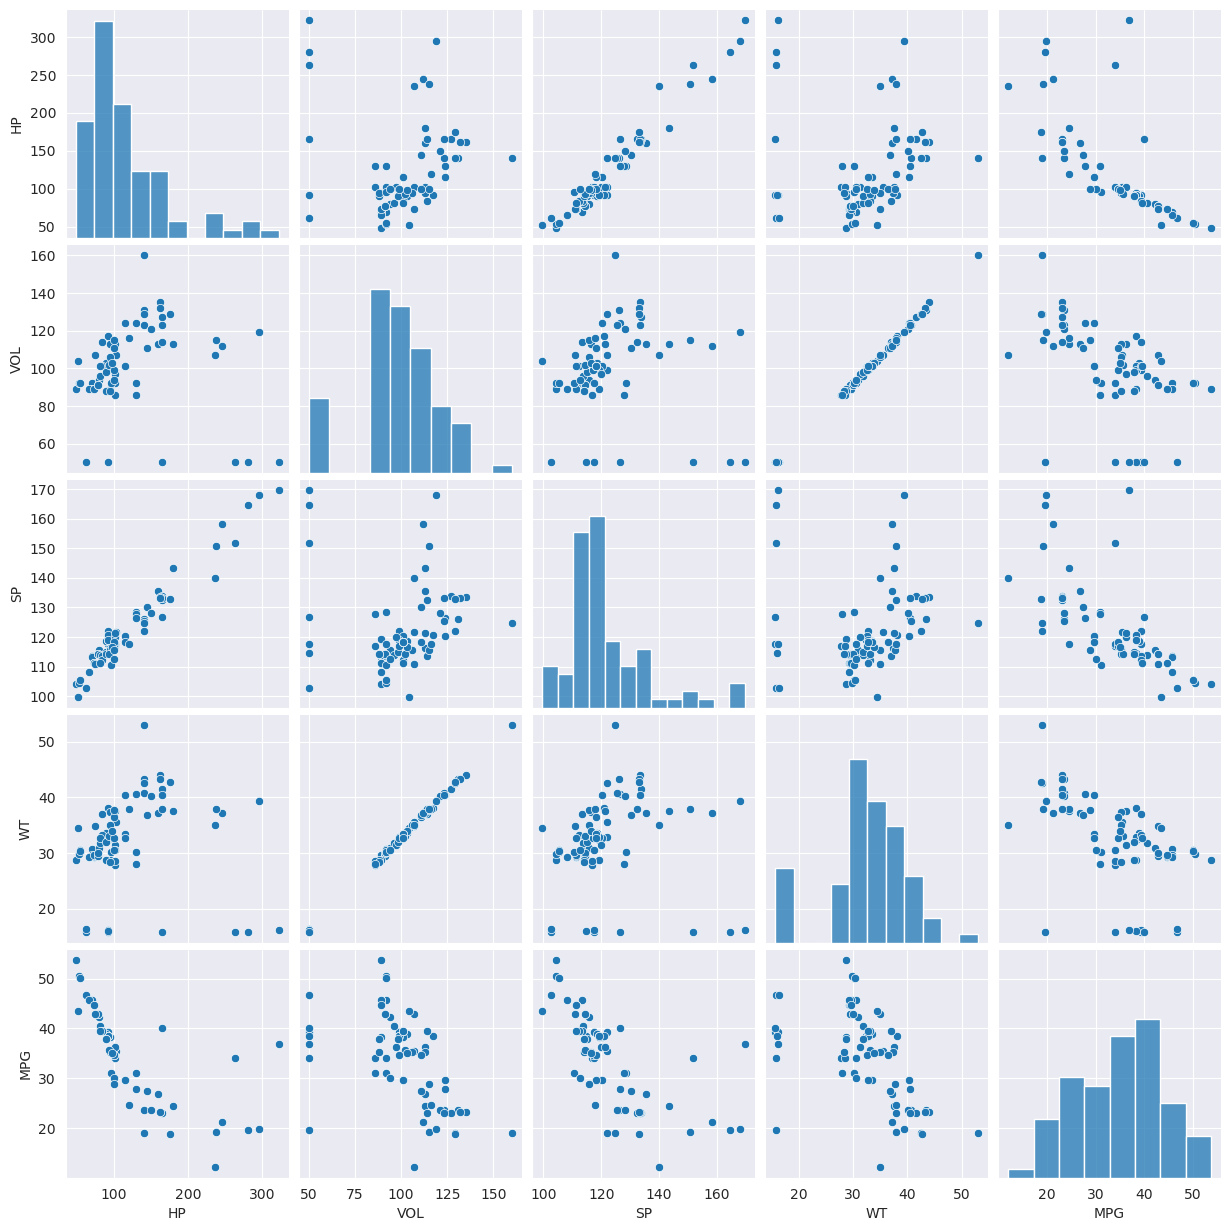

In [28]:
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [29]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


####  Observations
- highest positive correlation between WT and VOL
- higher postive correlation between HP and SP
- most of the correlations are negative correlation
- between x and y Hp and MPG has the highest correlation

In [30]:
model1 = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        11:20:28   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Observations 
- The R-squeared and adjusted R-squared values are goof and about 75% of variability in y is explained by X columns
- The probability value with respect to F-statistic is close to zero, indicating taht all or some of X columns are signifiacnt
- The p-values for VOL and WT are higher than 5% indicating some interaction issue among themselves, which need to be futher explored 

In [31]:
df1 = pd.DataFrame()
df1['actual_y1'] = cars['MPG']
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [32]:
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1['pred_y1'] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [33]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df1['actual_y1'], df1['pred_y1'])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 18.89714115234311
RMSE : 4.347084212704317


#### Checking for multicollinearity among X-columns using VIF method

In [34]:
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [35]:
# Compute VIF values
rsq_hp = smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_wt = smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared  
vif_wt = 1/(1-rsq_wt) 

rsq_vol = smf.ols('VOL~WT+SP+HP',data=cars).fit().rsquared  
vif_vol = 1/(1-rsq_vol) 

rsq_sp = smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared  
vif_sp = 1/(1-rsq_sp) 

# Storing vif values in a data frame
d1 = {'Variables':['Hp','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Hp,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


#### Observations
- The idea range of VIF values shall be between 0 to 10.However slightly higher values can be tolarated
- As seen from the very high VIF values for VOL and WT, it is clear that they are prone to multicollinearity pro
- Hence it is decided to drop one of the Column(either VOL or Wt) to overcome the multicollinearity.
- IT is decided to drop Wt and retain VOl column in further models

In [36]:
cars1 = cars.drop("WT", axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [37]:
import statsmodels.formula.api as smf
model2 = smf.ols("MPG~VOL+HP",data=cars1).fit()

In [38]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     117.4
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           2.98e-24
Time:                        11:20:29   Log-Likelihood:                -237.33
No. Observations:                  81   AIC:                             480.7
Df Residuals:                      78   BIC:                             487.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.5864      2.506     26.574      0.000      61.598      71.575
VOL           -0.1948      0.023     -8.389      0.000      -0.241      -0.149
HP            -0.1100      0.009    -12.135      0.000      -0.128      -0.092
==============================================================================
Omnibus:                        4.802   Durbin-Watson:                   1.360
Prob(Omnibus):                  0.091   Jarque-Bera (JB):                4.006
Skew:                           0.482   Prob(JB):                        0.135
Kurtosis:                       3.506   Cond. No.                         785.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
df2 = pd.DataFrame()
df2['actual_y2'] = cars['MPG']
df2.head()

,actual_y2
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [40]:
pred_y2 = model2.predict(cars1.iloc[:,0:4])
df2['pred_y2'] = pred_y2
df2.head()

,actual_y2,pred_y2
0,53.700681,43.857952
1,50.013401,42.613384
2,50.013401,42.613384
3,45.696322,40.962949
4,50.504232,42.833442


#### Permormance metrics for model2

In [41]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df2['actual_y2'], df2['pred_y2'])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 20.53405966708982
RMSE : 4.5314522690953964


#### Observations form model1 and model2
- The adjusted R-squared value improved slightly to 0.76
- All the p-values for model parameters are less than 5% hence they are significant
- Therefore the HP, VOL,SP coloumns are finilized as the significant predictor for the MPG
- There is no imporvement in MSE value

#### Identification of High Influence points(spatial outliers)

In [42]:
cars1.shape

(81, 4)

In [43]:
k = 3 # number of x columns
n = 81 # number of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.14814814814814814

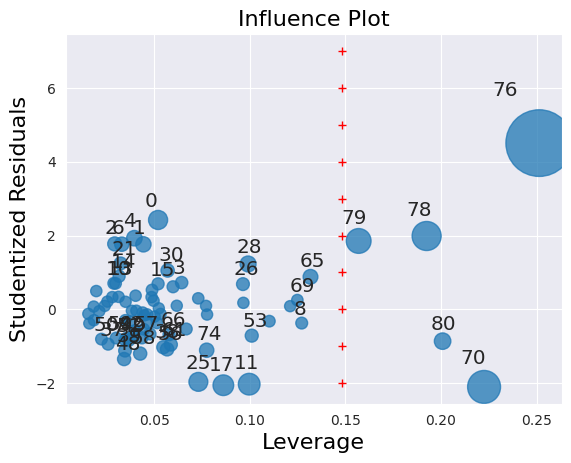

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

- From the above plot,it is evident that data points 65,70,76,78,79,80 are the influencers.
- as their H Leverage values are higher and size is higher

In [45]:
cars1[cars1.index.isin([65,70,76,78,79,80])]

,HP,VOL,SP,MPG
65,165,50,126.598513,40.050000
70,280,50,164.598513,19.678507
76,322,50,169.598513,36.900000
78,263,50,151.598513,34.000000
79,295,119,167.944460,19.833733
80,236,107,139.840817,12.101263


In [46]:
cars2=cars1.drop(cars1.index[[65,70,76,78,79,80]],axis=0).reset_index(drop=True)
cars2

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
70,162,132,133.140074,23.203569
71,140,160,124.715241,19.086341
72,140,129,121.864163,19.086341
73,175,129,132.864163,18.762837


#### Bulid model3 on cars2 dataset

In [47]:
model3 = smf.ols("MPG~VOL+HP",data=cars2).fit()

In [48]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     193.0
Date:                Sat, 08 Feb 2025   Prob (F-statistic):           1.19e-29
Time:                        11:20:29   Log-Likelihood:                -199.30
No. Observations:                  75   AIC:                             404.6
Df Residuals:                      72   BIC:                             411.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.4977      2.114     30.042      0.000      59.284      67.711
VOL           -0.1024      0.025     -4.126      0.000      -0.152      -0.053
HP            -0.1711      0.013    -13.569      0.000      -0.196      -0.146
==============================================================================
Omnibus:                        4.539   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                3.793
Skew:                           0.418   Prob(JB):                        0.150
Kurtosis:                       3.717   Cond. No.                         786.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
df3 = pd.DataFrame()
df3['actual_y3'] = cars2['MPG']
df3.head()

,actual_y3
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [50]:
pred_y3 = model3.predict(cars2.iloc[:,0:3])
df3['pred_y3'] = pred_y3
df3.head()

,actual_y3,pred_y3
0,53.700681,45.999715
1,50.013401,44.665722
2,50.013401,44.665722
3,45.696322,42.098608
4,50.504232,45.008004


In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df3['actual_y3'], df3['pred_y3'])
print("MSE :",mse)
print("RMSE :",np.sqrt(mse))

MSE : 11.90383333486441
RMSE : 3.4501932315255055


In [52]:
cars2.shape

(75, 4)

In [53]:
k = 3 # number of x columns
n = 75 # number of rows
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.16

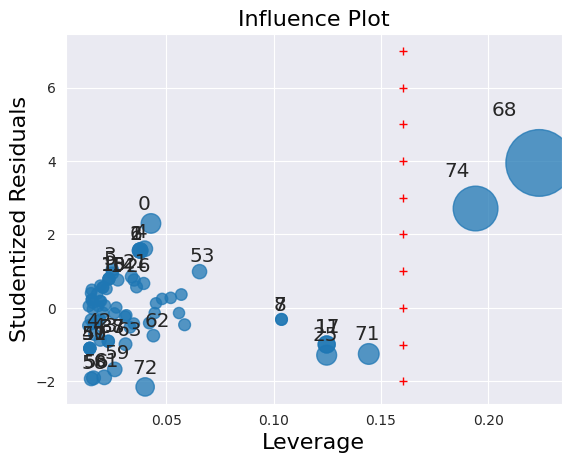

In [54]:
influence_plot(model3,alpha=0.5)
y=[i for i in range(-2,8)]
x=[leverage_cutoff for i in range(10)]
plt.plot(x,y,'r+')
plt.show()

In [55]:
cars2[cars2.index.isin([68,74])]

,HP,VOL,SP,MPG
68,245,112,158.300669,21.273708
74,238,115,150.576579,19.197888


In [56]:
cars3=cars2.drop(cars2.index[[68,74]],axis=0).reset_index(drop=True)
cars3

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
68,162,135,133.415985,23.203569
69,162,132,133.140074,23.203569
70,140,160,124.715241,19.086341
71,140,129,121.864163,19.086341


In [57]:
cars3=cars2.drop(cars2.index[[70]],axis=0).reset_index(drop=True)
cars3

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232
...,...,...,...,...
69,162,135,133.415985,23.203569
70,140,160,124.715241,19.086341
71,140,129,121.864163,19.086341
72,175,129,132.864163,18.762837


#### Comparison of models


| Metric         | Model 1  | model 2  | model 3  |
|----------------|----------|----------|----------|
| R-Squared      | 0.0771   | 0.770    | 0.885    |
| ADj. R-Squared | 0.758    | 0.761    | 0.880    |
| MSE            | 18.89    | 18.91    | 8.68     |
| RMSE           | 4.34     | 4.34     | 2.94     |


#### Check the validity of model assumptions for model3

In [58]:
model3.resid

0     7.700966
1     5.347680
2     5.347680
3     3.597715
4     5.496228
        ...   
70    0.945230
71   -4.070386
72   -7.244246
73   -1.577817
74    8.205756
Length: 75, dtype: float64

In [59]:
model3.fittedvalues

0     45.999715
1     44.665722
2     44.665722
3     42.098608
4     45.008004
        ...    
70    22.258339
71    23.156727
72    26.330587
73    20.340654
74    10.992132
Length: 75, dtype: float64

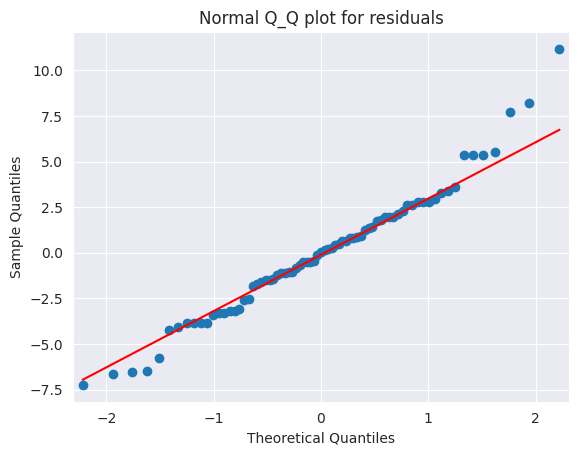

In [60]:
import statsmodels.api as sm
qqplot=sm.qqplot(model3.resid,line='q')
plt.title('Normal Q_Q plot for residuals')
plt.show()

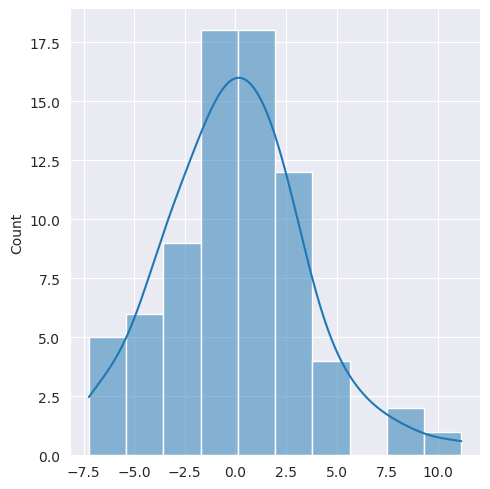

In [61]:
sns.displot(model3.resid, kde = True)

In [62]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

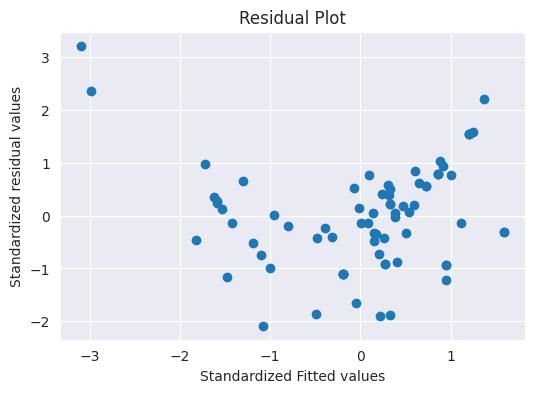

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()